In [2]:
!gdown 1dSiUf-a7m34gUl3LLPmKDS6-v5sRBUZ0

Downloading...
From: https://drive.google.com/uc?id=1dSiUf-a7m34gUl3LLPmKDS6-v5sRBUZ0
To: /content/advertising.csv
100% 4.06k/4.06k [00:00<00:00, 14.5MB/s]


In [3]:
import pandas as pd

df = pd.read_csv('advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import random

random.seed(0)
%matplotlib inline

def load_data_from_file(file_name='advertising.csv'):
  data = np.genfromtxt(file_name, delimiter=',', skip_header=1)
  features_X = data[:, :3]
  sales_y = data[:, 3]
  features_X = np.hstack((np.ones((features_X.shape[0],1)), features_X))

  return features_X, sales_y

features_X, _ = load_data_from_file()
print(features_X[:5,:])

[[  1.  230.1  37.8  69.2]
 [  1.   44.5  39.3  45.1]
 [  1.   17.2  45.9  69.3]
 [  1.  151.5  41.3  58.5]
 [  1.  180.8  10.8  58.4]]


In [11]:
_, sales_Y = load_data_from_file()
print(sales_Y.shape)

(200,)


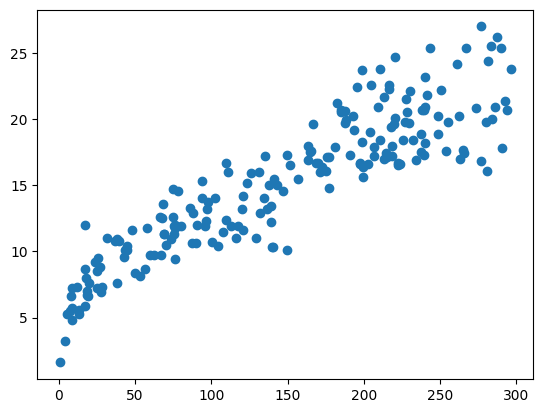

In [88]:
plt.scatter(features_X[:,1], sales_Y)
plt.show()

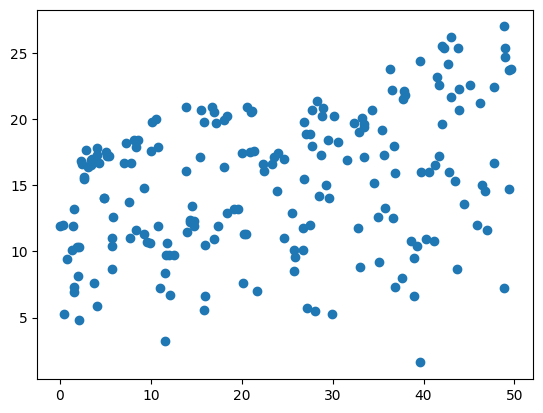

In [89]:
plt.scatter(features_X[:,2], sales_Y)
plt.show()

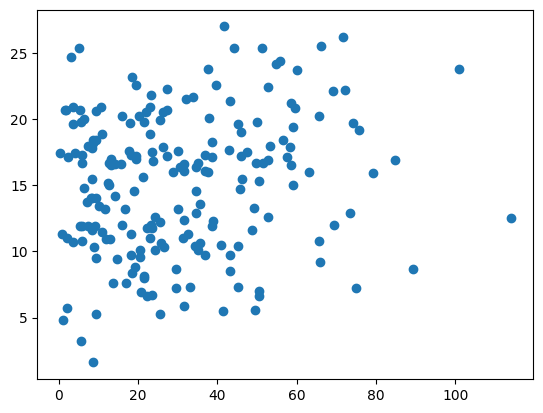

In [90]:
plt.scatter(features_X[:,3], sales_Y)
plt.show()

In [14]:
def create_individual(n=4, bound = 10):
  return [random.uniform(-bound /2, bound / 2) for _ in range(n)]

individual = create_individual()
print(individual)

[4.677999949201714, -1.419506253050117, 3.9166065982068243, -2.8155727308476832]


In [17]:
features_X, sales_y = load_data_from_file()

def compute_loss(individual):
  theta = np.array(individual)
  y_hat = features_X.dot(theta)

  loss = np.mean((y_hat - sales_y) ** 2)
  return loss

compute_loss(individual)

66346.5523060571

In [18]:
def compute_fitness(individual):
  loss = compute_loss(individual)
  return 1 / (loss + 1)

compute_fitness(individual)

1.507214607386061e-05

In [20]:
features_X, sales_Y = load_data_from_file()
individual = [4.09, 4.82, 3.10, 4.02]
fitness_score = compute_fitness(individual)
print(fitness_score)

1.0185991537088997e-06


In [46]:
def crossover(individual1, individual2, crossover_rate = 0.5):
  individual1_copy = individual1.copy()
  individual2_copy = individual2.copy()

  for i in range(len(individual1)):
    if random.random() < crossover_rate:
      individual1_copy[i] = individual2[i]
      individual2_copy[i] = individual1[i]

  return individual1_copy, individual2_copy

In [22]:
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57,-0.79,-2.41]
individual1, individual2 = crossover(individual1, individual2, 2.0)
print("individual1: ", individual1)
print("individual2: ", individual2)

individual1:  [3.44, 2.57, -0.79, -2.41]
individual2:  [4.09, 4.82, 3.1, 4.02]


In [47]:
def mutate(individual, mutation_rate = 0.5):
  for i in range(len(individual)):
    if random.random() < mutation_rate:
      individual[i] += random.uniform(-1, 1)
  return individual

In [39]:
before_individual = [4.09, 4.82, 3.10, 4.02]
after_individual = mutate(individual, mutation_rate = 2.0)
print(before_individual == after_individual)

False


In [23]:
def initializePopulation(m):
  return [create_individual() for _ in range(m)]

In [27]:
def selection(sorted_old_population, m = 100):
  rand = random.sample(range(0, m), 2)
  return sorted_old_population[rand[0]] if rand[0] > rand[1] else sorted_old_population[rand[1]]

In [128]:
def create_new_population(old_population, elitism = 2, gen = 1, mutate_rate=0.1, cross_rate=0.2):
  m = len(old_population)
  sorted_population = sorted(old_population, key = compute_fitness)
  loss = compute_loss(sorted_population[m-1])

  if gen % 100 == 0:
    print("Best loss:", loss, "with chromsome: ", sorted_population[m-1])

  new_population = []
  while len(new_population) < m - elitism:
    # selection
    parent1 = selection(sorted_population, m)
    parent2 = selection(sorted_population, m)
    while parent1 == parent2:
      parent2 = selection(sorted_population, m)

    child1, child2 = crossover(parent1, parent2, cross_rate)
    child1 = mutate(child1, mutate_rate)
    child2 = mutate(child2, mutate_rate)
    new_population.append(child1)
    if len(new_population) < m - elitism:
      new_population.append(child2)

  for ind in sorted_population[m - elitism:]:
    new_population.append(ind)

  return new_population, loss


In [129]:
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57,-0.79,-2.41]
old_population = [individual1, individual2]
new_population, _ = create_new_population(old_population, elitism=2, gen=1)

In [132]:
def run_GA():
  n_generation = 500
  m = 600
  features_X, sales_Y = load_data_from_file()
  population = initializePopulation(m)
  losses_list = []
  for gen in range(n_generation):
    population, loss = create_new_population(population, elitism=2, gen=gen)
    losses_list.append(loss)
  return losses_list, population


Best loss: 1061.5990194060284 with chromsome:  [-2.599476432911981, 0.28740968437058534, -1.793558594413783, 0.48860221119647207]
Best loss: 2.8365690099629672 with chromsome:  [4.124379909239501, 0.058652304663127985, 0.1052530745845317, -0.0014675604362917039]
Best loss: 2.7428867739534097 with chromsome:  [4.377286996286478, 0.05666378339131972, 0.1052530745845317, -0.0009296435567986983]
Best loss: 2.7108338937322576 with chromsome:  [4.5895736107793645, 0.05514450083170419, 0.1052530745845317, -0.0006695070005691139]
Best loss: 2.7072919000139226 with chromsome:  [4.575666316377992, 0.05480944995313153, 0.10587629000824084, 0.0010078992078708104]


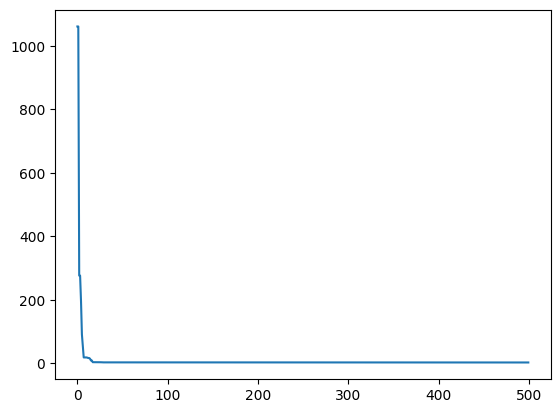

In [133]:
import matplotlib.pyplot as plt

losses, population = run_GA()
plt.plot(losses)
plt.show()

[4.585627596646547, 0.05480944995313153, 0.10587629000824084, 0.000760930435885987]


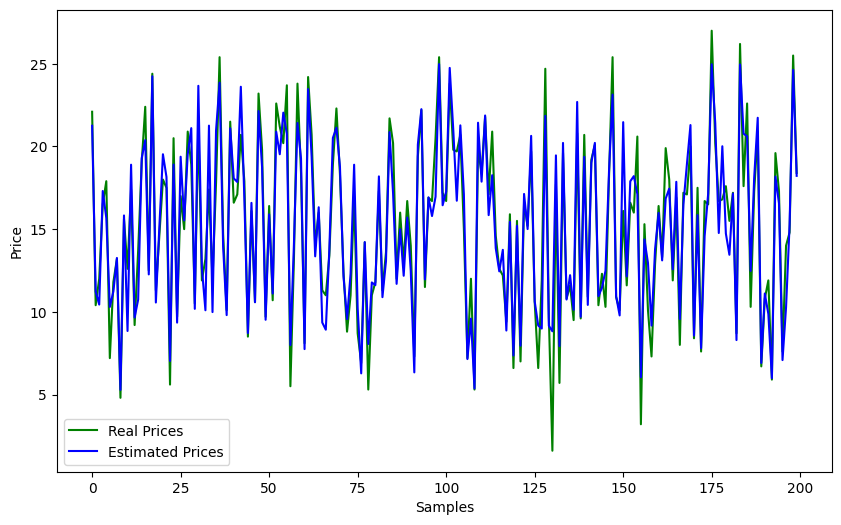

In [134]:
def visualize_predict_gt():
    # visualization of ground truth and predict value
    sorted_population = sorted(population, key=compute_fitness)
    print(sorted_population[-1])
    theta = np.array(sorted_population[-1])
    estimated_prices = []
    for feature in features_X:
      estimated_price = feature.dot(theta)
      estimated_prices.append(estimated_price)

    fig, ax = plt.subplots(figsize=(10, 6))
    plt.xlabel('Samples')
    plt.ylabel('Price')
    plt.plot(sales_Y, c='green', label='Real Prices')
    plt.plot(estimated_prices, c='blue', label='Estimated Prices')
    plt.legend()
    plt.show()

visualize_predict_gt()
